## Imports

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [144]:
data = pd.read_csv('./data/creditcard.csv')
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Share of frodulent/non-frodulent transactions

Non-fordulent transactions: 284315
Frodulent transactions: 492
Share of non-frodulent transactions: 99.83 %
Share of frodulent transactions: 0.17 %


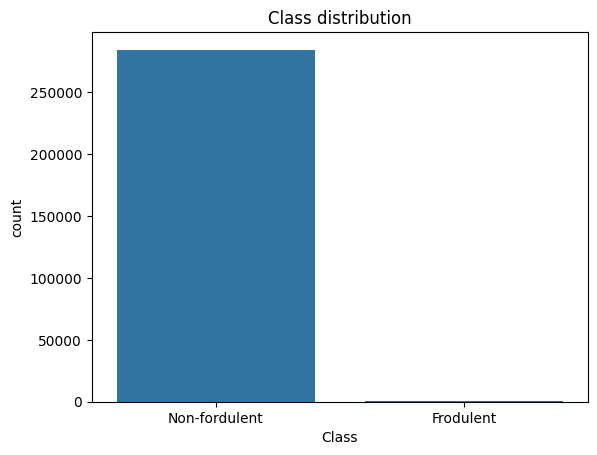

In [145]:
non_frodulent_transactions = data['Class'].value_counts()[0]
frodulent_transactions = data['Class'].value_counts()[1]

transaction_countplot = sns.countplot(x='Class', data=data)
transaction_countplot.set_xticks(transaction_countplot.get_xticks())
transaction_countplot.set_xticklabels(['Non-fordulent', 'Frodulent'])
plt.title('Class distribution')

print(f'Non-fordulent transactions: {non_frodulent_transactions}')
print(f'Frodulent transactions: {frodulent_transactions}')
print(f'Share of non-frodulent transactions: {round(non_frodulent_transactions/len(data) * 100, 2)} %')
print(f'Share of frodulent transactions: {round(frodulent_transactions/len(data) * 100, 2)} %')

### Data preprocessing

#### Scaling

In [146]:
from sklearn.preprocessing import MinMaxScaler

_X = data.drop("Class", axis=1)

func_1 = lambda x: np.floor(np.log10(x.max()))
func_2 = lambda x: np.floor(np.log10(x.max() - x.min()))

max_feature_val_magn = _X.apply(func_1)
max_feature_val_magn_range = max_feature_val_magn.max() - max_feature_val_magn.min()

feature_val_magn_diff = _X.apply(func_2)
feature_val_magn_diff_range = feature_val_magn_diff.max() - feature_val_magn_diff.min()

scaler = MinMaxScaler()
_X_scaled = pd.DataFrame(scaler.fit_transform(_X), columns=_X.columns)

max_feature_val_magn_scaled = _X_scaled.apply(func_1)
max_feature_val_magn_range_scaled = max_feature_val_magn_scaled.max() - max_feature_val_magn_scaled.min()

feature_val_magn_diff_scaled = _X_scaled.apply(func_2)
feature_val_magn_diff_range_scaled = feature_val_magn_diff_scaled.max() - feature_val_magn_diff_scaled.min()

print('Difference between max and min largest feature value magnitudes')
print(f'Before scaling: {max_feature_val_magn_range}')
print(f'After scaling: {max_feature_val_magn_range_scaled}')
print('\nDifference between max and min feature value magnitude ranges')
print(f'Before scaling: {feature_val_magn_diff_range}')
print(f'After scaling: {feature_val_magn_diff_range_scaled}')

Difference between max and min largest feature value magnitudes
Before scaling: 5.0
After scaling: 1.0

Difference between max and min feature value magnitude ranges
Before scaling: 5.0
After scaling: 1.0


In [147]:
from sklearn.model_selection import train_test_split

X = data.drop("Class", axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

scaler = MinMaxScaler()
scaler.fit(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Synthetic Minority Oversampling

In [148]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print('Distribution of classes in training set')
print('\nBefore synthetic oversampling:')
print(y_train.value_counts().rename({0: 'Non-frodulent', 1: 'Frodulent'}).to_string(header=False))
print('\nAfter synthetic oversampling:')
print(y_train_smote.value_counts().rename({0: 'Non-frodulent', 1: 'Frodulent'}).to_string(header=False))

Distribution of classes in training set

Before synthetic oversampling:
Non-frodulent    227451
Frodulent           394

After synthetic oversampling:
Non-frodulent    227451
Frodulent        227451


## Models

In [149]:
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

### Helper functions

In [150]:
def _present_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)
  
  accuracy = metrics.accuracy_score(y_true=y_test, y_pred=prediction)
  precision = metrics.precision_score(y_true=y_test, y_pred=prediction)
  recall = metrics.recall_score(y_true=y_test, y_pred=prediction)
  f1 = metrics.f1_score(y_true=y_test, y_pred=prediction)

  confusion_matrix_heatmap = sns.heatmap(metrics.confusion_matrix(y_true=y_test, y_pred=prediction),
                                         annot=True)
  confusion_matrix_heatmap.set_xticklabels(['Detected non-frodulent', 'Detected frodulent'])
  confusion_matrix_heatmap.set_yticklabels(['Non-frodulent', 'Frodulent'])

  print(model)
  print(f'Accuracy: {accuracy:.6f}\nPrecision: {precision:.6f}\nRecall: {recall:.6f}\nF1: {f1:.6f}')


def present_model(model):
  _present_model(model, X_train, y_train, X_test, y_test)


def present_model_scaled(model):
  _present_model(model, X_train_scaled, y_train, X_test_scaled, y_test)


def present_model_scaled_smote(model):
  _present_model(model, X_train_smote, y_train_smote, X_test_scaled, y_test)

In [151]:
def plot_grid_search_cv_hyperparams_heatmap(grid_search_cv,
                                            param1,
                                            param2,
                                            score_metric='mean_test_score',
                                            score_fmt='.3f',
                                            cmap='viridis',
                                            figsize=(10, 6),
                                            param1_values_transformation=None,
                                            param2_values_transformation=None):
    cv_results = pd.DataFrame(grid_search_cv.cv_results_)
    heatmap_data = cv_results.pivot(index=f'param_{param2}', columns=f'param_{param1}', values=score_metric)

    if param1_values_transformation:
        heatmap_data.columns = heatmap_data.columns.map(param1_values_transformation)
    if param2_values_transformation:
        heatmap_data.index = heatmap_data.index.map(param2_values_transformation)

    plt.figure(figsize=figsize)
    sns.heatmap(heatmap_data,
                annot=True,
                fmt=score_fmt,
                cmap=cmap,
                cbar_kws={'label': score_metric.replace('_', ' ').capitalize()})
    plt.title('Grid Search CV Results')
    plt.xlabel(param1)
    plt.ylabel(param2)
    plt.show()

### Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression

logistic_regression_grid_search_params = {
    'estimator': LogisticRegression(random_state=42, max_iter=1000),
    'param_grid': {'C': np.logspace(3, 9, 7), 'penalty': ['l2']},
    'scoring': 'roc_auc',
    'cv': 3
}

#### Using scaled data

In [153]:
_lrm_cv = GridSearchCV(**logistic_regression_grid_search_params)
_lrm_cv.fit(X_train_scaled, y_train);

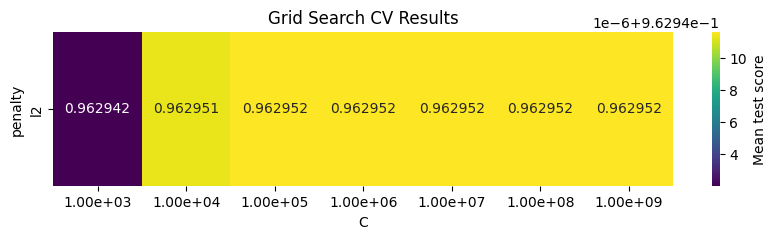

Tuned hpyerparameters: C=1.00e+06, penalty=l2
ROC AUC: 0.962952


In [154]:
plot_grid_search_cv_hyperparams_heatmap(grid_search_cv=_lrm_cv,
                                        param1='C',
                                        param2='penalty',
                                        score_fmt='.6f',
                                        figsize=(10, 2),
                                        param1_values_transformation=lambda x: f'{x:.2e}')

best_C = _lrm_cv.best_params_['C']
best_penalty = _lrm_cv.best_params_['penalty']
best_score = _lrm_cv.best_score_

print(f'Tuned hpyerparameters: C={best_C:.2e}, penalty={best_penalty}')
print(f'ROC AUC: {best_score:.6f}')

LogisticRegression(C=1000000.0, max_iter=1000, random_state=42)
Accuracy: 0.999105
Precision: 0.813333
Recall: 0.622449
F1: 0.705202


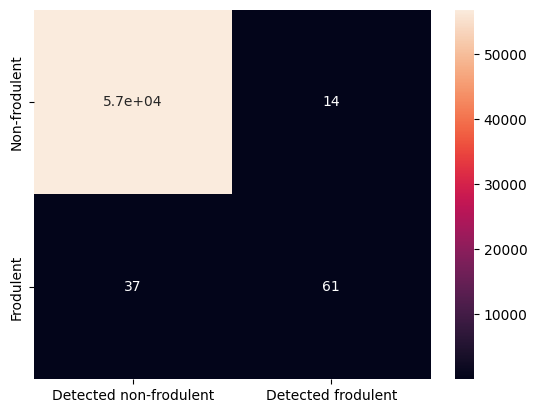

In [155]:
_lrm_tuned = LogisticRegression(penalty=_lrm_cv.best_params_['penalty'],
                               C=_lrm_cv.best_params_['C'],
                               random_state=42,
                               max_iter=1000)

present_model_scaled(_lrm_tuned)

#### Using scaled and oversampled data

In [156]:
lrm_cv = GridSearchCV(**logistic_regression_grid_search_params)
lrm_cv.fit(X_train_smote, y_train_smote);

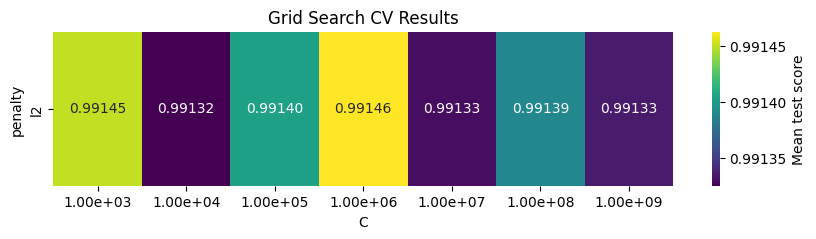

Tuned hpyerparameters: C=1.00e+06, penalty=l2
ROC AUC: 0.991463


In [157]:
plot_grid_search_cv_hyperparams_heatmap(grid_search_cv=lrm_cv,
                                        param1='C',
                                        param2='penalty',
                                        score_fmt='.5f',
                                        figsize=(10, 2),
                                        param1_values_transformation=lambda x: f'{x:.2e}')

best_C = lrm_cv.best_params_['C']
best_penalty = lrm_cv.best_params_['penalty']
best_score = lrm_cv.best_score_

print(f'Tuned hpyerparameters: C={best_C:.2e}, penalty={best_penalty}')
print(f'ROC AUC: {best_score:.6f}')

LogisticRegression(C=1000000.0, max_iter=1000, random_state=42)
Accuracy: 0.973737
Precision: 0.057034
Recall: 0.918367
F1: 0.107399


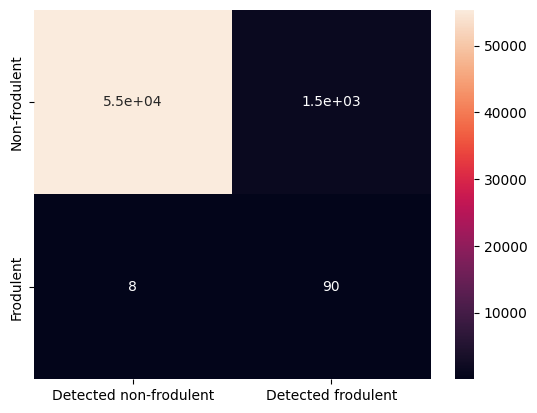

In [159]:
lrm_tuned = LogisticRegression(penalty=lrm_cv.best_params_['penalty'],
                               C=lrm_cv.best_params_['C'],
                               random_state=42,
                               max_iter=1000)

present_model_scaled_smote(lrm_tuned)

In [162]:
_params = logistic_regression_grid_search_params.copy()
_params['scoring'] = 'f1'
_params['param_grid'] = {'C': np.logspace(0, 6, 7), 'penalty': ['l2']}

lrm_cv_f1_scoring = GridSearchCV(**_params)
lrm_cv_f1_scoring.fit(X_train_smote, y_train_smote);

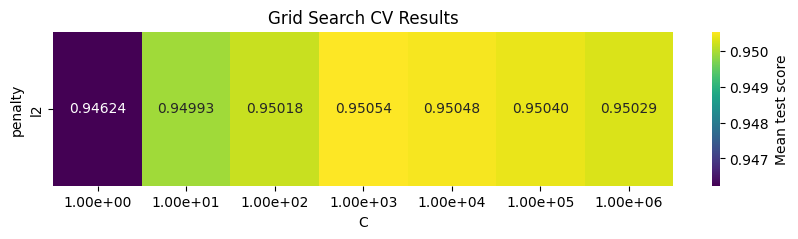

Tuned hpyerparameters: C=1.00e+03, penalty=l2
F1: 0.950544


In [163]:
plot_grid_search_cv_hyperparams_heatmap(grid_search_cv=lrm_cv_f1_scoring,
                                        param1='C',
                                        param2='penalty',
                                        score_fmt='.5f',
                                        figsize=(10, 2),
                                        param1_values_transformation=lambda x: f'{x:.2e}')

best_C = lrm_cv_f1_scoring.best_params_['C']
best_penalty = lrm_cv_f1_scoring.best_params_['penalty']
best_score = lrm_cv_f1_scoring.best_score_

print(f'Tuned hpyerparameters: C={best_C:.2e}, penalty={best_penalty}')
print(f'F1: {best_score:.6f}')

LogisticRegression(C=1000.0, max_iter=1000, random_state=42)
Accuracy: 0.973333
Precision: 0.056215
Recall: 0.918367
F1: 0.105945


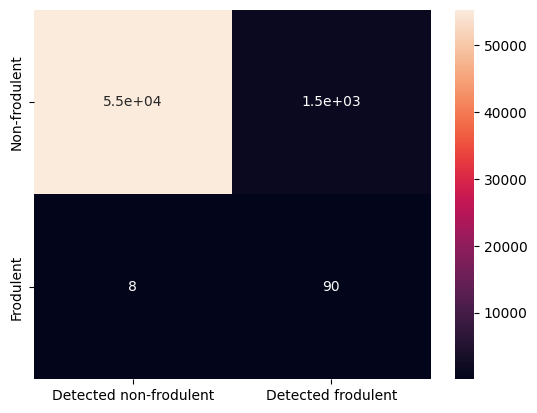

In [164]:
lrm_tuned_f1_scoring = LogisticRegression(penalty=lrm_cv_f1_scoring.best_params_['penalty'],
                               C=lrm_cv_f1_scoring.best_params_['C'],
                               random_state=42,
                               max_iter=1000)

present_model_scaled_smote(lrm_tuned_f1_scoring)